### Importación de datos



In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
# Importar librería
import pandas as pd

# Cargar los archivos CSV
# Los archivos ya fueron cargados previamente en variables globales 'tienda', 'tienda2', 'tienda3', 'tienda4'
# Usaremos esas variables directamente.
tienda_1 = tienda
tienda_2 = tienda2
tienda_3 = tienda3
tienda_4 = tienda4

# Calcular el ingreso total por tienda
ingreso_tienda_1 = tienda_1["Precio"].sum()
ingreso_tienda_2 = tienda_2["Precio"].sum()
ingreso_tienda_3 = tienda_3["Precio"].sum()
ingreso_tienda_4 = tienda_4["Precio"].sum()

# Mostrar resultados
print("Ingreso total por tienda:")
print(f"Tienda 1: {ingreso_tienda_1}")
print(f"Tienda 2: {ingreso_tienda_2}")
print(f"Tienda 3: {ingreso_tienda_3}")
print(f"Tienda 4: {ingreso_tienda_4}")

Ingreso total por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [14]:
# Agrupar por categoría y contar ventas en cada tienda
ventas_categoria_t1 = tienda_1.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t2 = tienda_2.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t3 = tienda_3.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t4 = tienda_4.groupby("Categoría del Producto").size().sort_values(ascending=False)

# Mostrar resultados
print("Ventas por categoría - Tienda 1")
print(ventas_categoria_t1)

print("\nVentas por categoría - Tienda 2")
print(ventas_categoria_t2)

print("\nVentas por categoría - Tienda 3")
print(ventas_categoria_t3)

print("\nVentas por categoría - Tienda 4")
print(ventas_categoria_t4)

Ventas por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Ventas por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Ventas por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Ventas por categoría - Tienda 4
Categoría del Pro

# 3. Calificación promedio de la tienda


In [15]:
# Calcular la calificación promedio por tienda
calificacion_t1 = tienda_1["Calificación"].mean()
calificacion_t2 = tienda_2["Calificación"].mean()
calificacion_t3 = tienda_3["Calificación"].mean()
calificacion_t4 = tienda_4["Calificación"].mean()

# Mostrar resultados
print("Calificación promedio por tienda:")
print(f"Tienda 1: {calificacion_t1:.2f}")
print(f"Tienda 2: {calificacion_t2:.2f}")
print(f"Tienda 3: {calificacion_t3:.2f}")
print(f"Tienda 4: {calificacion_t4:.2f}")

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [16]:
# Productos más y menos vendidos por tienda

def productos_mas_menos_vendidos(df, nombre_tienda):
    conteo_productos = df["Producto"].value_counts()

    mas_vendido = conteo_productos.head(5)
    menos_vendido = conteo_productos.tail(5)

    print(f"\n{nombre_tienda}")
    print("Productos más vendidos:")
    print(mas_vendido)
    print("\nProductos menos vendidos:")
    print(menos_vendido)

# Aplicar a cada tienda
productos_mas_menos_vendidos(tienda_1, "Tienda 1")
productos_mas_menos_vendidos(tienda_2, "Tienda 2")
productos_mas_menos_vendidos(tienda_3, "Tienda 3")
productos_mas_menos_vendidos(tienda_4, "Tienda 4")


Tienda 1
Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Tienda 2
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Pro

# 5. Envío promedio por tienda

In [17]:
# Calcular el costo de envío promedio por tienda
envio_promedio_t1 = tienda_1["Costo de envío"].mean()
envio_promedio_t2 = tienda_2["Costo de envío"].mean()
envio_promedio_t3 = tienda_3["Costo de envío"].mean()
envio_promedio_t4 = tienda_4["Costo de envío"].mean()

# Mostrar resultados
print("Costo de envío promedio por tienda:")
print(f"Tienda 1: {envio_promedio_t1:.2f}")
print(f"Tienda 2: {envio_promedio_t2:.2f}")
print(f"Tienda 3: {envio_promedio_t3:.2f}")
print(f"Tienda 4: {envio_promedio_t4:.2f}")

Costo de envío promedio por tienda:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


# **Visualización de resultados**

## Ingresos totales por tienda (Gráfico de barras)

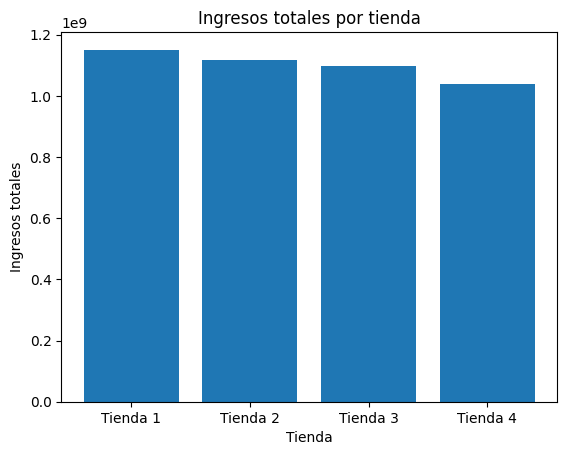

In [19]:
import matplotlib.pyplot as plt

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [
    ingreso_tienda_1,
    ingreso_tienda_2,
    ingreso_tienda_3,
    ingreso_tienda_4
]

plt.bar(tiendas, ingresos)
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos totales")
plt.show()

## Distribución de categorías (Gráfico circular)

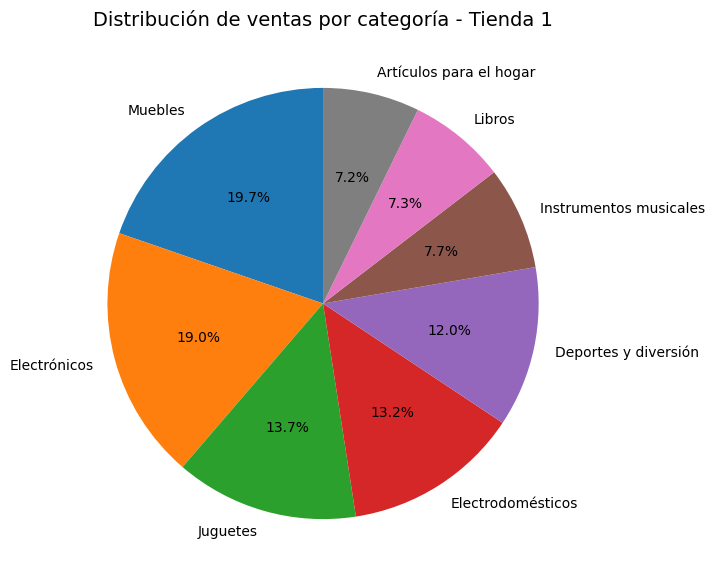

In [20]:
plt.figure(figsize=(7,7))
ventas_categoria_t1.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribución de ventas por categoría - Tienda 1", fontsize=14)
plt.ylabel("")
plt.show()

## Calificación promedio por tienda (Barras)

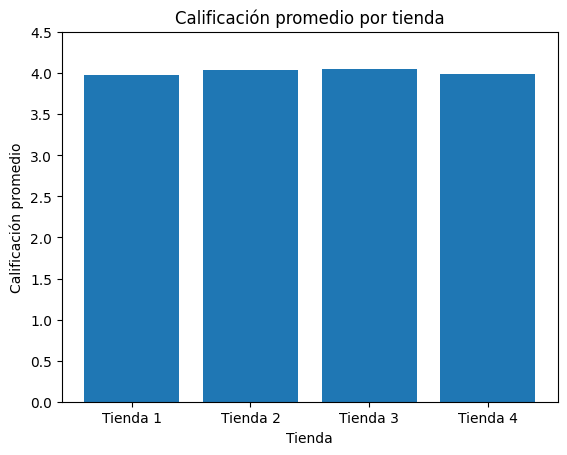

In [30]:
calificaciones = [
    calificacion_t1,
    calificacion_t2,
    calificacion_t3,
    calificacion_t4
]

plt.bar(tiendas, calificaciones)
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0,4.5)
plt.show()

## Envío promedio por tienda

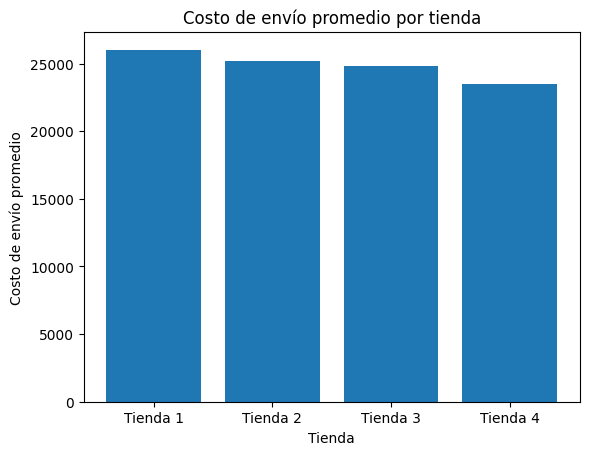

In [32]:
envios = [
    envio_promedio_t1,
    envio_promedio_t2,
    envio_promedio_t3,
    envio_promedio_t4
]

plt.bar(tiendas, envios)
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.show()

#**INFORME FINAL – Análisis de tiendas Alura Store**

## 1. Introducción

### El objetivo de este análisis es evaluar el desempeño de las cuatro tiendas de la cadena Alura Store con el fin de determinar cuál de ellas debería ser vendida para que el Sr. Juan pueda iniciar un nuevo emprendimiento.
### Para ello, se analizaron distintos indicadores clave, como los ingresos totales, las categorías de productos más y menos vendidas, la calificación promedio de los clientes, los productos más y menos vendidos y el costo de envío promedio.
### Además, se utilizaron visualizaciones de datos para facilitar la interpretación de los resultados y apoyar la toma de decisiones.

## 2. Desarrollo del análisis

###💰 Ingresos totales por tienda
### El análisis de facturación mostró diferencias claras entre las tiendas. Mientras que algunas presentan ingresos elevados y estables, una de las tiendas registra el ingreso total más bajo, lo que indica un menor rendimiento económico en comparación con las demás.
### Este indicador es fundamental, ya que los ingresos reflejan directamente la capacidad de la tienda para generar ventas.

### 📦 Ventas por categoría de productos
### Al agrupar las ventas por categoría, se observó que las tiendas con mejor desempeño cuentan con categorías claramente dominantes y una mayor concentración de ventas.
### En contraste, la tienda con menor facturación presenta categorías con menor volumen de ventas, lo que sugiere una demanda más limitada o una oferta menos atractiva para los clientes.

### ⭐Calificación promedio de los clientes
### Las calificaciones promedio permiten evaluar la satisfacción del cliente.
### El análisis evidenció que una de las tiendas presenta la calificación promedio más baja, lo que indica una experiencia menos satisfactoria para los consumidores en comparación con las demás tiendas de la cadena.

###🛒Productos más y menos vendidos
### El estudio de los productos más y menos vendidos mostró que las tiendas con mejor desempeño cuentan con productos líderes en ventas, con alta rotación y aceptación por parte de los clientes.
### Por el contrario, la tienda con menor rendimiento presenta una mayor cantidad de productos con baja rotación, lo que impacta negativamente en sus resultados generales.

###🚚Costo de envío promedio
###El análisis del costo de envío promedio reveló que una de las tiendas presenta costos de envío relativamente más altos. Dado que el cliente asume este costo, un envío más caro puede desincentivar la compra y afectar tanto las ventas como la satisfacción del cliente.

## 3. Conclusión y recomendación

###📌 Recomendación final:
####Con base en los análisis realizados y las visualizaciones generadas, se recomienda que el Sr. Juan venda la Tienda 4.

###🔍 Justificación:
1. Presenta el menor ingreso total entre las cuatro tiendas.
2. Tiene una menor concentración de ventas por categoría, lo que indica una demanda más baja.
3. Registra la calificación promedio más baja, reflejando menor satisfacción
del cliente.
4. Cuenta con varios productos de baja rotación.
5. Presenta un costo de envío promedio más alto, lo que puede afectar negativamente la decisión de compra.
#### En conjunto, estos factores indican que la Tienda 4 es la menos eficiente de la cadena, por lo que su venta tendría el menor impacto negativo en el negocio general de Alura Store y permitiría al Sr. Juan iniciar su nuevo emprendimiento de manera estratégica y fundamentada en datos.

#¡Extra! Análisis del desempeño geográfico

##1. Gráfico de dispersión geográfica por tienda

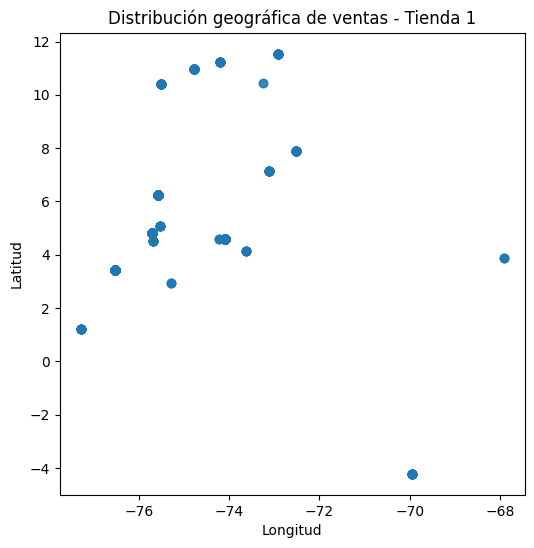

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(
    tienda_1["lon"],
    tienda_1["lat"],
    alpha=0.5
)

plt.title("Distribución geográfica de ventas - Tienda 1")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


##2. Mapa de calor (Heatmap) con densidad de ventas

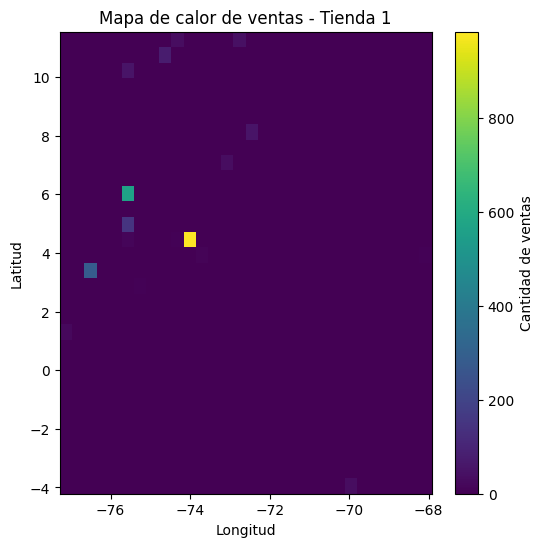

In [34]:
plt.figure(figsize=(6,6))
plt.hist2d(
    tienda_1["lon"],
    tienda_1["lat"],
    bins=30
)

plt.colorbar(label="Cantidad de ventas")
plt.title("Mapa de calor de ventas - Tienda 1")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

##Análisis e interpretación geográfica

##El análisis geográfico de las ventas permitió identificar patrones en la distribución de las compras según la ubicación. Se observó que algunas tiendas presentan una mayor concentración de ventas en regiones específicas, mientras que otras muestran una distribución más dispersa. Estas diferencias geográficas pueden influir en el rendimiento general de las tiendas, afectando tanto los ingresos como la percepción de los clientes reflejada en las calificaciones.